# Data Science Project – Segmentazione della clientela usando Machine Learning in R

In questo progetto verrà utilizzata una delle maggiori applicazioni di machine learning: la segmentazione dei clienti, che consiste nell'identificare, suddividere e raggruppare i propri utenti in specifici gruppi basati su caratteristiche comuni. Questa pratica consente una comunicazione più mirata, fatta di contenuti dinamici, personalizzati, pertinenti e tempestivi, che permettono di creare un rapporto one-to-one tra azienda e customer.

La segmentazione dei clienti è una delle più importanti applicazioni del unsupervised machine learning. Usando tecniche di clustering, le imprese possono identificare i diversi segmenti di clienti. In questo progetto verrà utilizzato l’algoritmo chiamato K-means clustering, il quale è il principale algoritmo per il clustering di dataset non etichettato (unsupervised).

Con il termine Clustering (in italiano « raggruppamento ») si intende un famiglia di metodi non supervisionati in grado di individuare raggruppamenti intrinseci (cluster) di pattern nello spazio multidimensionale e di definire in corrispondenza di tali raggruppamenti le classi (incognite). Il clustering ha applicazioni in numerose discipline (pattern recognition, machine learning, computer vision, data mining, data base) e pertanto ha sempre ricevuto un notevole interesse



<img src="cluster1.jpg"> 

Criteri e algoritmi di clustering sono due cose ben distinte i primi descrivono cosa si vuol ottenere specificando il grado di ottimalità di ogni soluzione ammissibile; i secondi, dato un
criterio di clustering, forniscono una procedura algoritmica per determinare soluzioni che lo ottimizzano. La segmentazione dei clienti é il processo di divisione della base di clienti in diversi gruppi di individui che condividono delle similitudini che sono rilevanti per il marketing, ossia, sesso, età, interessi, e abitudini di spesa molteplici.

Tra i diversi criteri possibili:<br>
- minimizzazione distanze dai centroidi: minimizza la somma dei quadrati delle distanze dei pattern x dai centroidi (baricentri) delle classi 


<img src="cluster2.jpg"> 

dove 𝐶𝑖 è l’i-esimo cluster, 𝑛𝑖 il numero di pattern che contiene e 𝐱𝑖 (xi medio) il suo centroide. È un buon criterio per cluster a simmetria radiale (circolari), ma penalizza forme allungate o cluster innestati (un cluster a forma di anello con all’interno un altro cluster).


 - minimizzazione distanze intra classe?? da aggiungere?


Clustering basato su centroidi:<br>
attraverso processi euristici (iterativi) si individuano i cluster cercando di minimizzare la distanza dei pattern dai centroidi dei cluster cui appartengono:
- K means
- Fuzzy K means
- Expectation - Maximization Gaussian Mixture <br><br>

#### K- means
K-means è un metodo computazionalmente molto semplice e altrettanto semplice da implementare per questo motivo è spesso la prima scelta per risolvere problemi di clustering.
<br>
- Minimizza «implicitamente» le distanze dai centroidi
- Richiede in input il numero di cluster 𝑠 e una soluzione iniziale 
- Produce buoni risultati a patto di fornire una ragionevole soluzione iniziale e un numero adeguato di classi 
- Il tipo di ottimizzazione è iterativa e locale pertanto il metodo può convergere a massimi locali della soluzione. La convergenza si ottiene solitamente in pochi passi: < 10
- Identifica cluster iper sferici nel caso in cui venga utilizzata la distanza euclidea come misura di distanza tra i pattern o cluster iper ellissoidali nel caso di distanza di Mahalanobis 
<br><br>
I cluster sono modificati iterativamente a seguito del ricalcolo del loro centroide. L’algoritmo termina (converge) quando i centroidi sono stabili e quindi le partizioni non cambiano.


### K-means : esempio 𝑛=86, 𝑠=3

inserire immaginie pag 9


Come primo passo verrà analizzato il dataset. Viene caricato il file con i dati richiesti per questo progetto e vengono letti i dati:


In [43]:
customer_data=read.csv("Mall_Customers.csv")
str(customer_data)
names(customer_data)
head(customer_data)
summary(customer_data$Age)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<fct>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [44]:
sd(customer_data$Age)
summary(customer_data$Annual.Income..k..)
sd(customer_data$Annual.Income..k..)
summary(customer_data$Age)
sd(customer_data$Spending.Score..1.100.)

[1] 13.96901

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] 26.26472

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

[1] 25.82352

Customer Gender Visualization
Creiamo un grafico a barre e uno a torta che mostra la distribuzione del sesso dei clienti con il seguente codice:


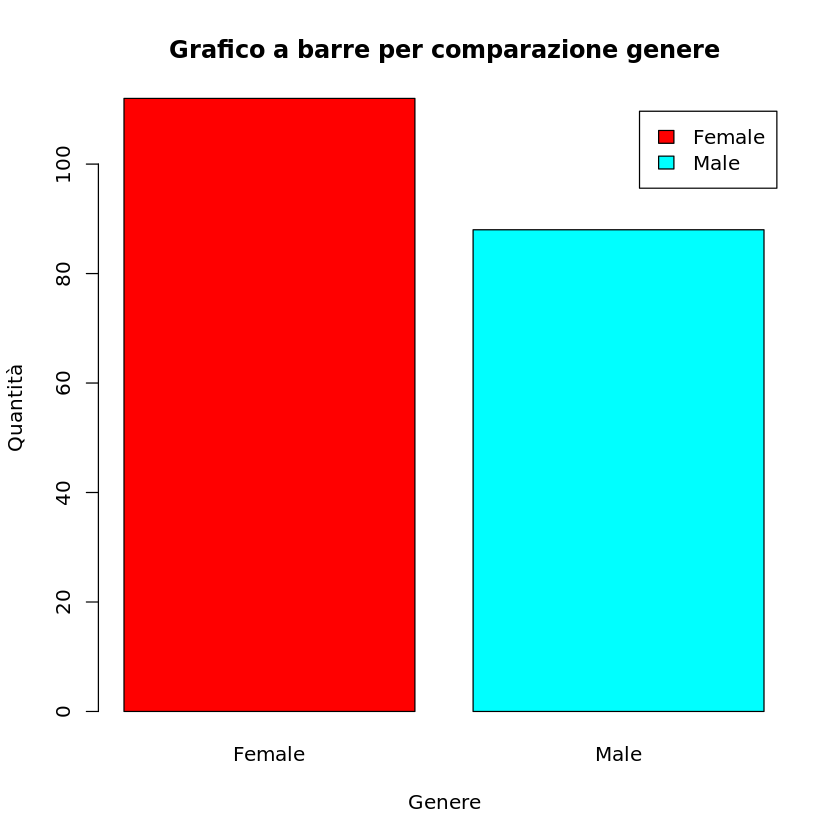

In [45]:
a=table(customer_data$Gender)
barplot(a,main="Grafico a barre per comparazione genere",
        ylab="Quantità",
        xlab="Genere",
        col=rainbow(2),
        legend=rownames(a))

Dal grafico si evince che il numero di femmine é piu alto rispetto al numero dei maschi.
Ora visualizziamo il grafico a torta per osservare il ratio di distribuzione tra maschi e femmine.


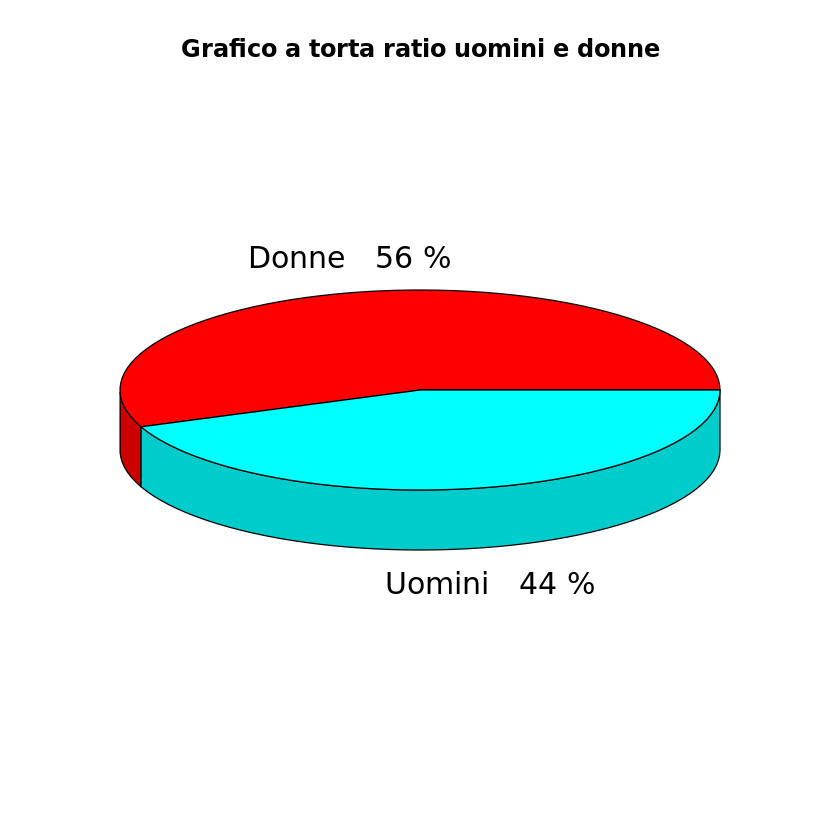

In [46]:
pct=round(a/sum(a)*100)
lbs=paste(c("Donne","Uomini")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
      main="Grafico a torta ratio uomini e donne")


Dal questo grafico concludiamo che la percentuale di femmine é del 56%, mentre quella dei maschi é del 44%.


### Visualization of Age Distribution

Vediamo ora l’istogramma della distribuzione della frequenza dell’età dei clienti.



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

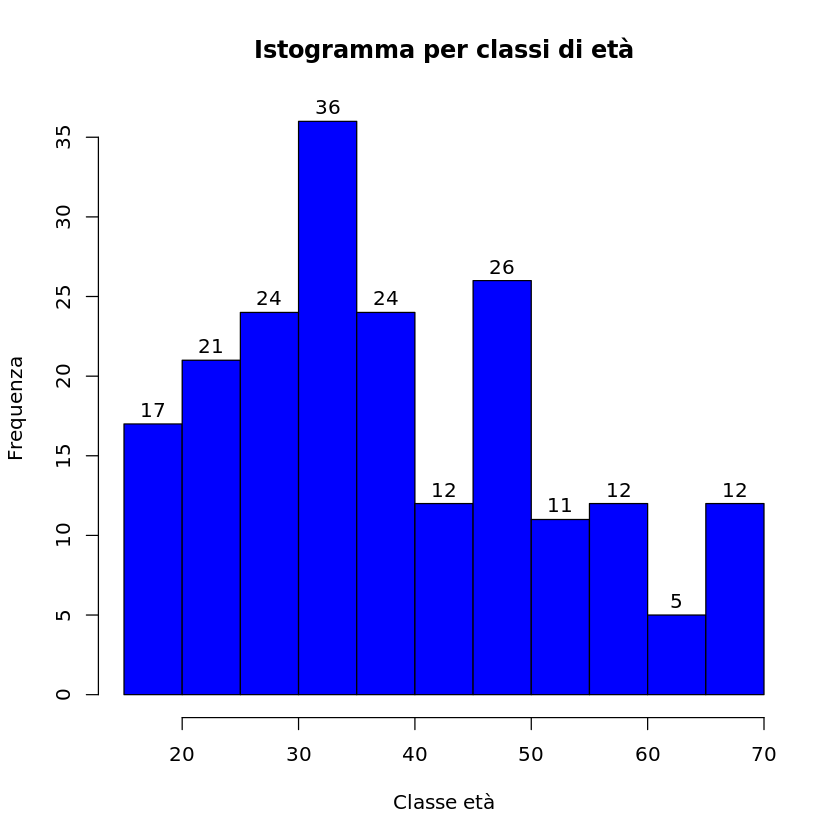

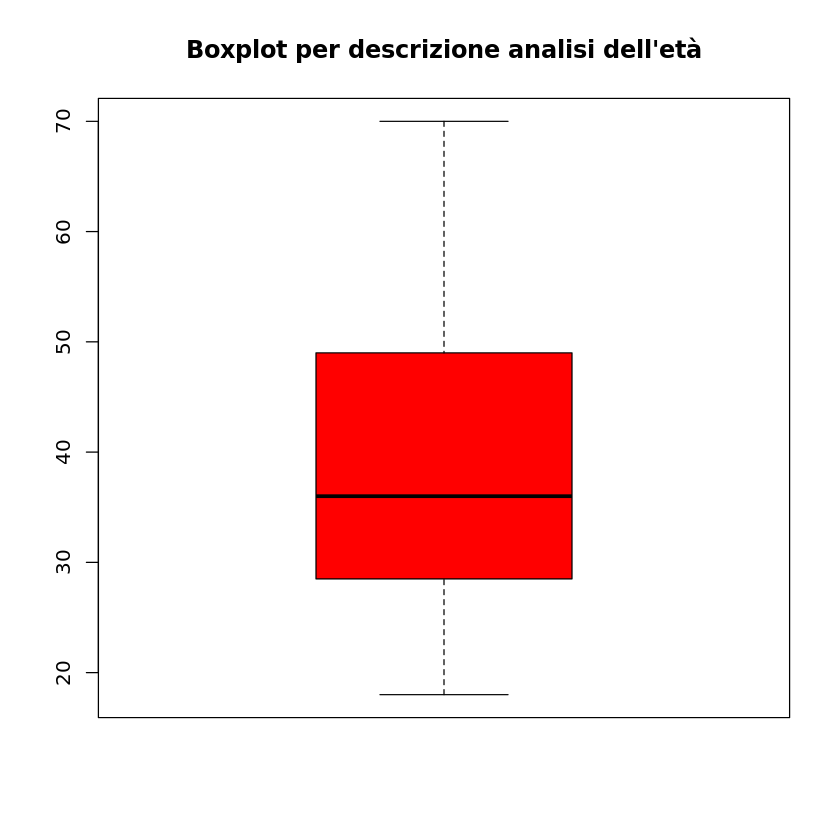

In [47]:
summary(customer_data$Age)
hist(customer_data$Age,
     col="blue",
     main="Istogramma per classi di età",
     xlab="Classe età",
     ylab="Frequenza",
     labels=TRUE)

boxplot(customer_data$Age,
        col="red",
        main="Boxplot per descrizione analisi dell'età")

Dai due grafici precedenti, possiamo concludere che l’età massima dei clienti é tra i 30 e 35 anni. l’età minima é invece 18 l’età massima è di 70 anni.


### Analysis of the Annual Income of the Customers

In questa sezione creiamo le visualizzazioni per analizzare il reddito annuale dei clienti. Prepariamo un istogramma e in seguito analizziamo con un grafico di densità.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

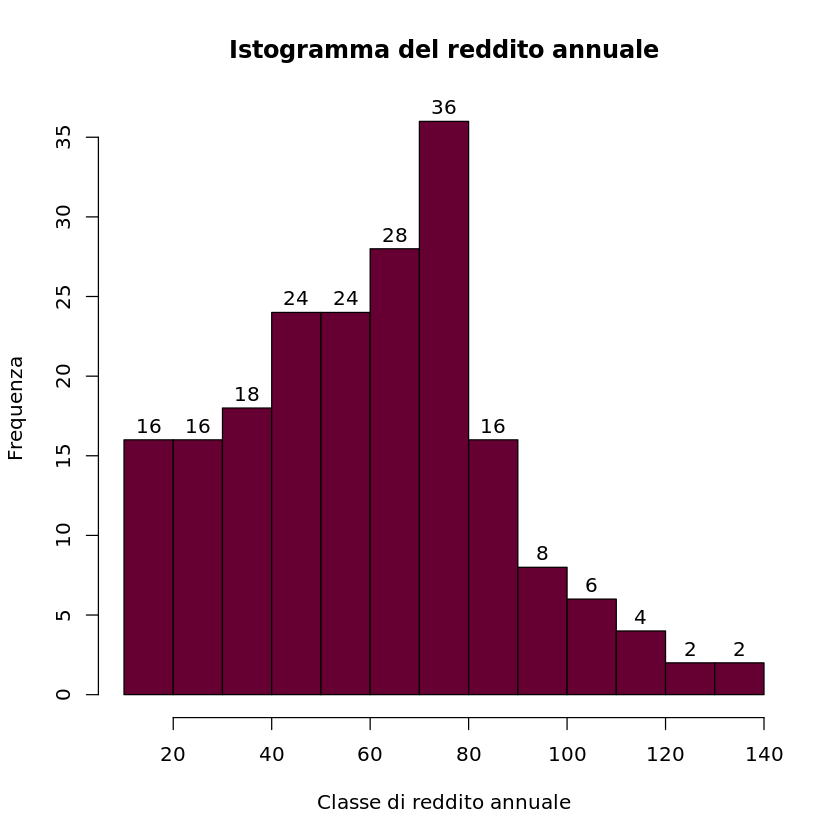

In [48]:
summary(customer_data$Annual.Income..k..)
hist(customer_data$Annual.Income..k..,
     col="#660033",
     main="Istogramma del reddito annuale",
     xlab="Classe di reddito annuale",
     ylab="Frequenza",
     labels=TRUE)

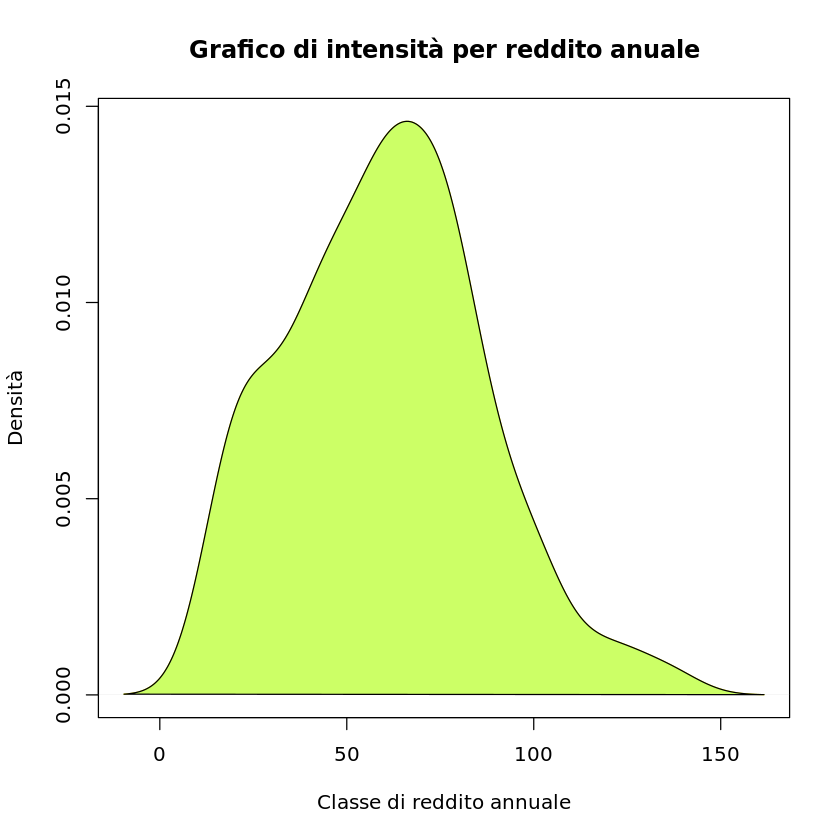

In [49]:

plot(density(customer_data$Annual.Income..k..),
     col="yellow",
     main="Grafico di intensità per reddito anuale",
     xlab="Classe di reddito annuale",
     ylab="Densità")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

dal grafico sopra possiamo concludere che il salario minimo dei clienti é pari a 15 and il massimo é pari a 137. Le persone che guadagnano in media 70 hanno la piu alta frequenza. 
Il salario medio di tutti i clienti é di 60.56. Nel grafico stampato sopra, possiamo osservare che il reddito annuale ha una distribuzione normale.


### Analyzing Spending Score of the Customers

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

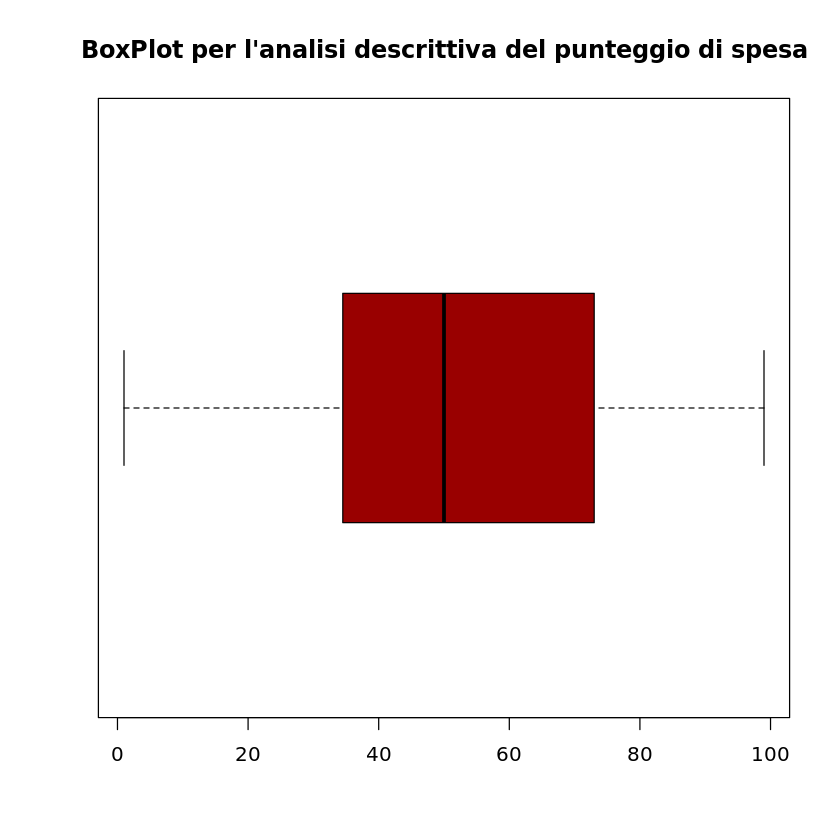

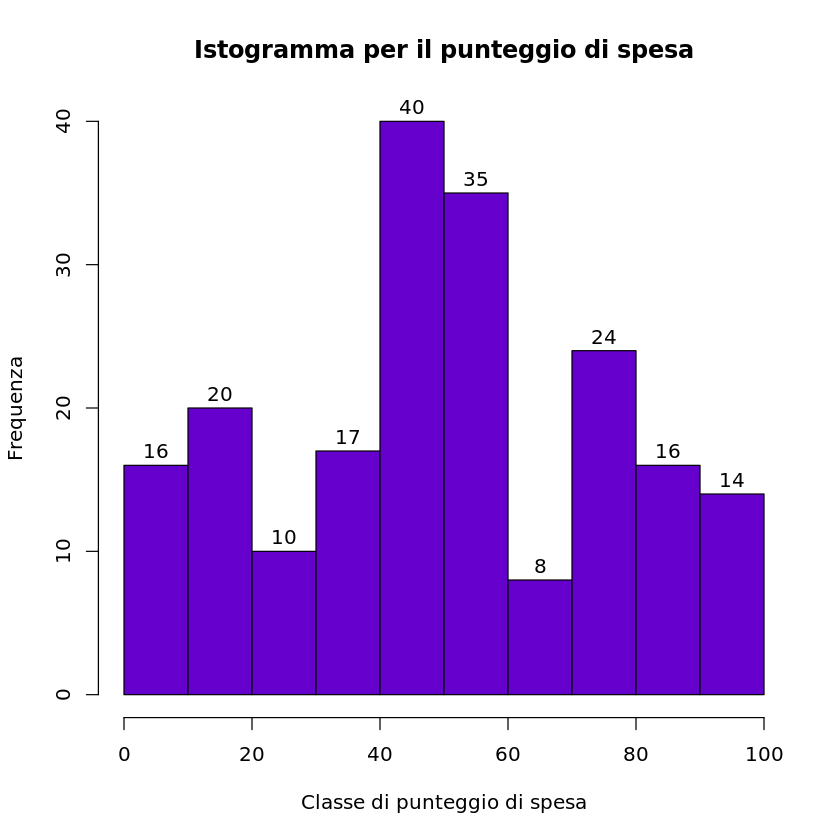

In [50]:
summary(customer_data$Spending.Score..1.100.)


boxplot(customer_data$Spending.Score..1.100.,
        horizontal=TRUE,
        col="#990000",
        main="BoxPlot per l'analisi descrittiva del punteggio di spesa")

hist(customer_data$Spending.Score..1.100.,
     main="Istogramma per il punteggio di spesa",
     xlab="Classe di punteggio di spesa",
     ylab="Frequenza",
     col="#6600cc",
     labels=TRUE)

Il punteggio di spesa minimo é 1, il massimo é 99 e la media é 50.20. Possiamo vedere l’analisi descrittiva del punteggio di spesa che il min é 1, max é 99 e avg é 50.20.
Dall’istogramma, possiamo concludere che i clienti tra la classe 40 e 50 hanno il più alto punteggio di spesa tra tutte le classi.


### K-means Algorithm

Utilizzando l’algoritmo k-means clustering, il primo passoé indicare il numero di clusters (k) che vogliamo ottenere nel risultato. L’algoritmo inizia dalla selezione casuale di k oggetti dal dataset che serivranno come centri iniziali per i nostri clusters. queste selezione di oggetti sono le medie dei clusters, anche conosciuti come centroidi. In seguito, gli oggetti rimanenti hanno un compito del piu vicino centroide. Questo centroide é definito dal Euclidean Distance presente tra l’oggetto e la media del cluster. Ci rifereriamo in questo passo come cluster assignement. Quando il compito é completo, l’algoritmo procede a calcolare nuova mesia per ogni cluster presente nei data. Dopo la ricalcolazione dei centri, le osservzioni ono controllate se sono piu vicini ad un altro cluster. Usando le medie dei cluster aggiornati, gli oggetti vengono riasegnati. Ripetendo questo processo molte volte fino a che si ferma l’assegnazione dei cluster. I cluster che sono presenti nell’iterazione corrente sono gli stessi ottenuti nelle iterazioni precedenti.

Riassumendo K-means clustering:<br>
- specifichiamo i lnumero di clusters che necesitiamo di creare<br>
-l algoritmo seleziona k oggetti a caso dal dataset.  Questo oggetto é il cluster iniziale o la media<br>
-il centroide piu vicino ottiene il compito per un nuova osservazione.<br>
-k clusters nei dati puntano ad aggiornare il centroide attravesrso la calcolazione di una nuova mesia di valori presenti in tutti i datidel cluster. Il k-esimo cluster del centroide ha una lunghezza di p che contiene meadia di tutte le vriabilei per osservazioni in k-esimo cluster. -Notiamo il numero di variabili con p.<br>
minimizzazione interattiva del totale entro la somma dei quadrati. Poi attreverso minimizzazione interattiva del totale della somme dei quadrati, il compito si ferme di muoversi quando raggiungiamo il massimo dell’iterazione. Il valore default é 10 che R software usa per il massimo di iterazioni.



### Determining Optimal Clusters


Lavorando con i clusters, bisogna specificare il numero di clusters da utilizzare. Si vorrebbe utilizzare il numero ottimale di clusters. Per aiutarsi a determinare il numero ottimale di clusters, ci sono tre metodi:Lavorando con i clusters, bisogna specificare il numero di clusters da utilizzare. Si vorrebbe utilizzare il numero ottimale di clusters. Per aiutarsi a determinare il numero ottimale di clusters, ci sono tre metodi:<br>
metodo Elbow<br>
metodo Silhouette<br>
metodo Gap<br>




### Elbow Method


L'obiettivo principale dietro i metodi di partizionamento dei cluster come k-mean è definire i cluster in modo tale che la variazione intra-cluster rimanga minima<br>
minimize(sum W(Ck)), k=1…k<br><br>
Dove Ck rappresenta il k-esimo cluster e W (Ck) indica la variazione all'interno del cluster. Con la misurazione della variazione totale all'interno del cluster, si può valutare la compattezza del limite del clustering. Possiamo quindi procedere a definire i cluster ottimali come segue:<br><br>
Innanzitutto, calcoliamo l'algoritmo di clustering per diversi valori di k. Questo può essere fatto creando una variazione di k da 1 a 10 cluster. Quindi calcoliamo la somma di quadrati totale intra-cluster. Quindi, procediamo al grafico della somma dei quadrati in base al numero di k cluster. Questo grafico indica il numero appropriato di cluster richiesti nel nostro modello. Nel grafico, la posizione di una curva o di un angolo è l'indicazione del numero ottimale di cluster. Cerchiamo di implementare questo in R come segue -


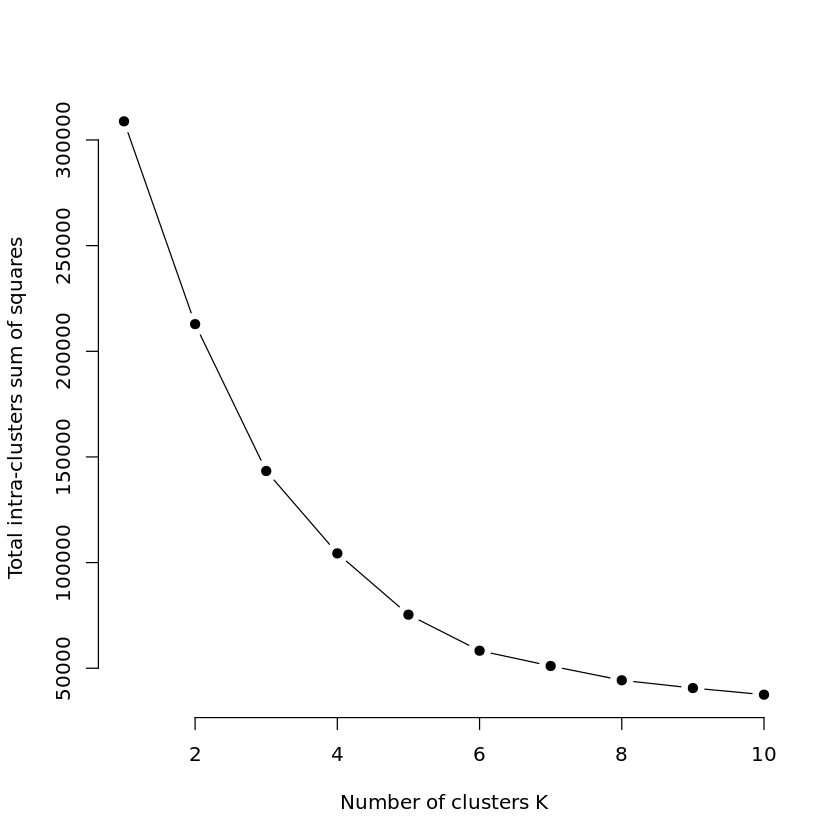

In [51]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}
k.values <- 1:10
iss_values <- map_dbl(k.values, iss)
plot(k.values, iss_values,
     type="b", pch = 19, frame = FALSE,
     xlab="Number of clusters K",
     ylab="Total intra-clusters sum of squares")

Dal grafico sopra, concludiamo che 4 è il numero appropriato di cluster poiché sembra apparire nella piega del gomito.

### Average Silhouette Method

Con l'aiuto del metodo della silhouette media, possiamo misurare la qualità della nostra operazione di clustering. Con questo, possiamo determinare quanto bene all'interno del cluster si trova l'oggetto dati. Se otteniamo una larghezza della sagoma media elevata, significa che abbiamo un buon raggruppamento. Il metodo di silhouette medio calcola la media delle osservazioni di silhouette per diversi valori di k. Con il numero ottimale di k cluster, è possibile massimizzare la silhouette media su valori significativi per k cluster.<br><br>
Usando la funzione silhouette nel pacchetto cluster, possiamo calcolare la larghezza media della silhouette usando la funzione kmean. Qui, il cluster ottimale avrà la media più alta.


In [52]:
library(cluster) 
library(gridExtra)
library(grid)

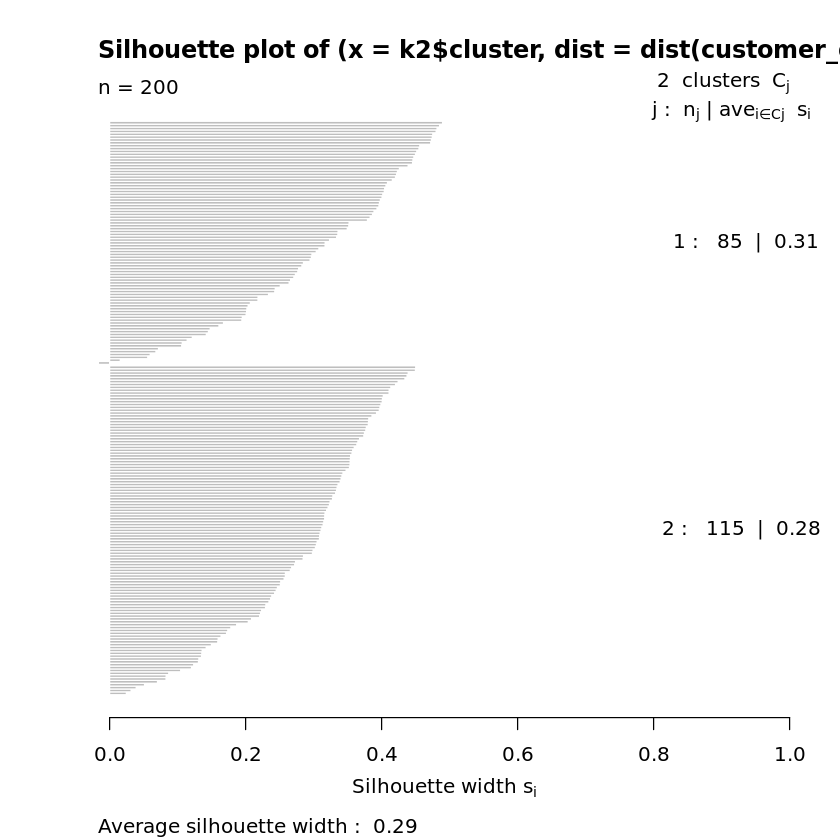

In [53]:
k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(customer_data[,3:5],"euclidean")))

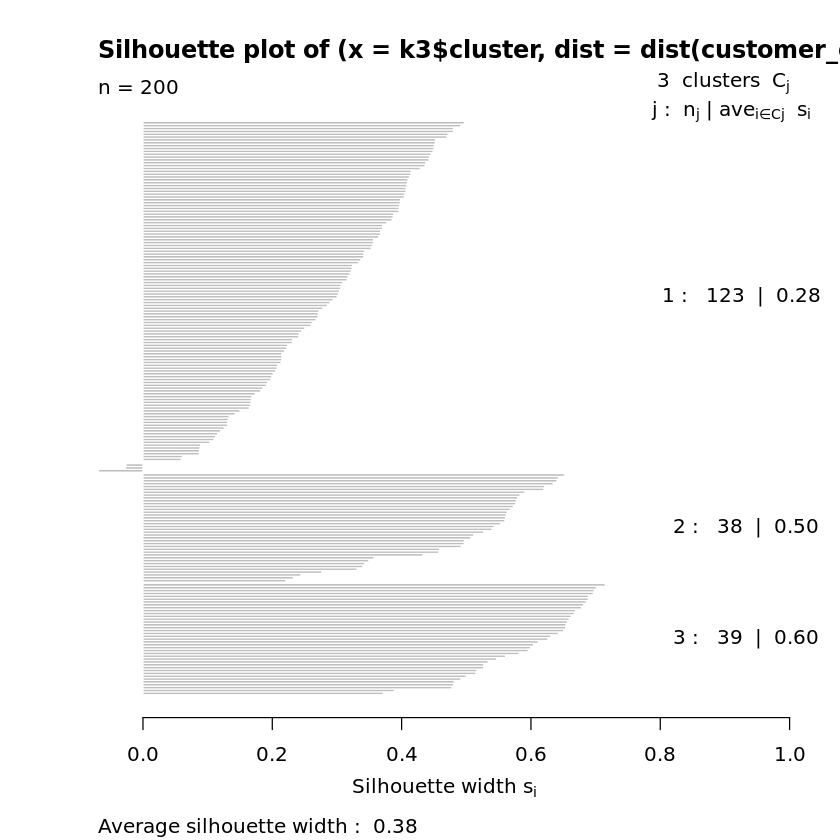

In [54]:
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

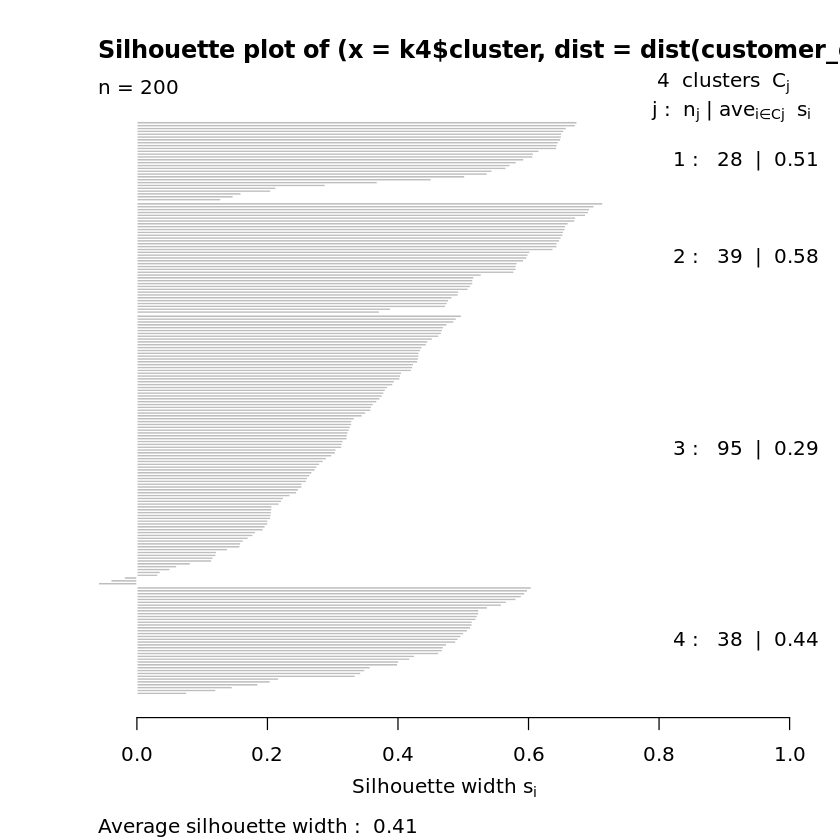

In [55]:
k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(customer_data[,3:5],"euclidean")))

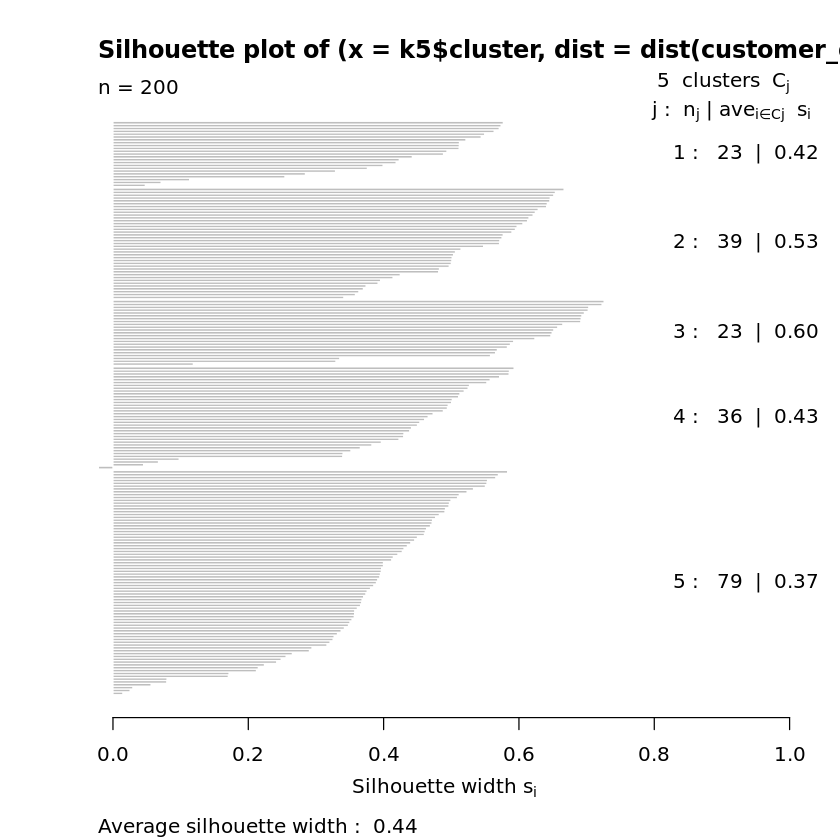

In [56]:
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))

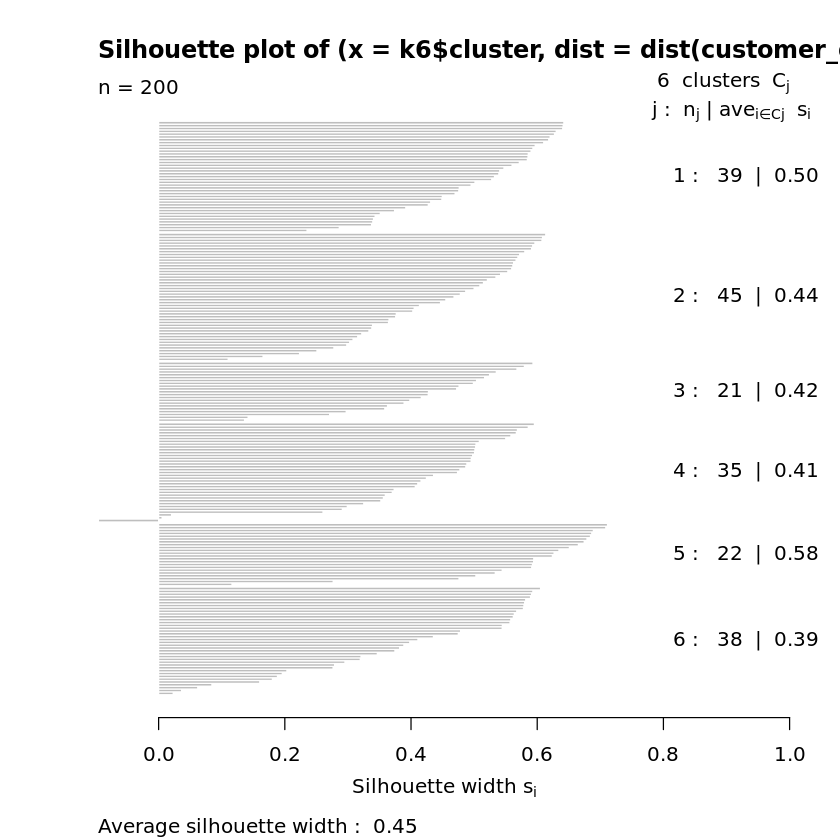

In [57]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))

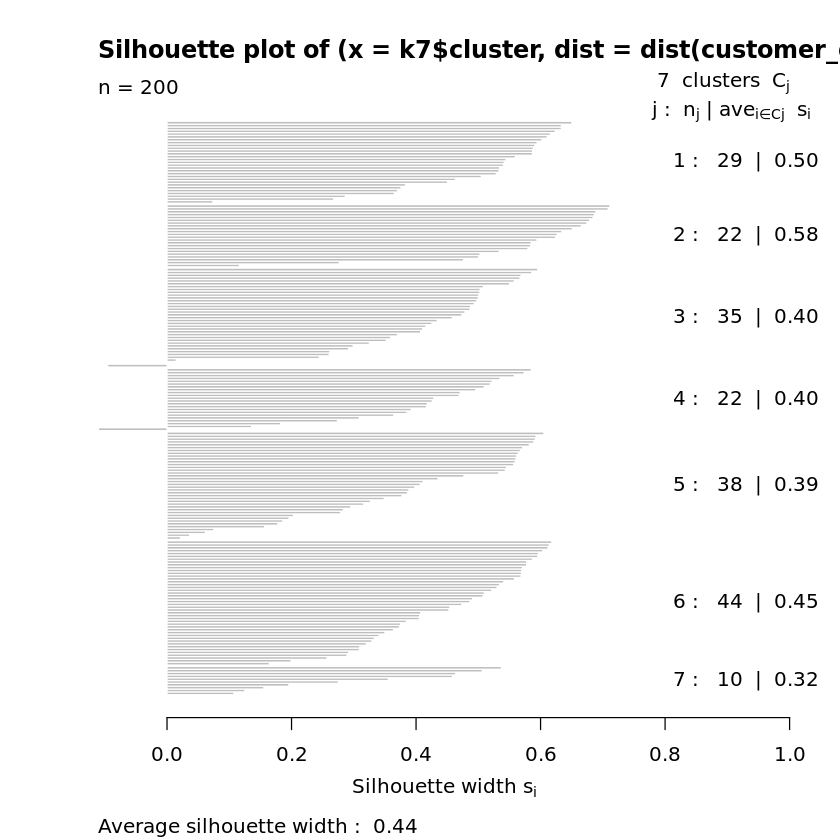

In [58]:
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))

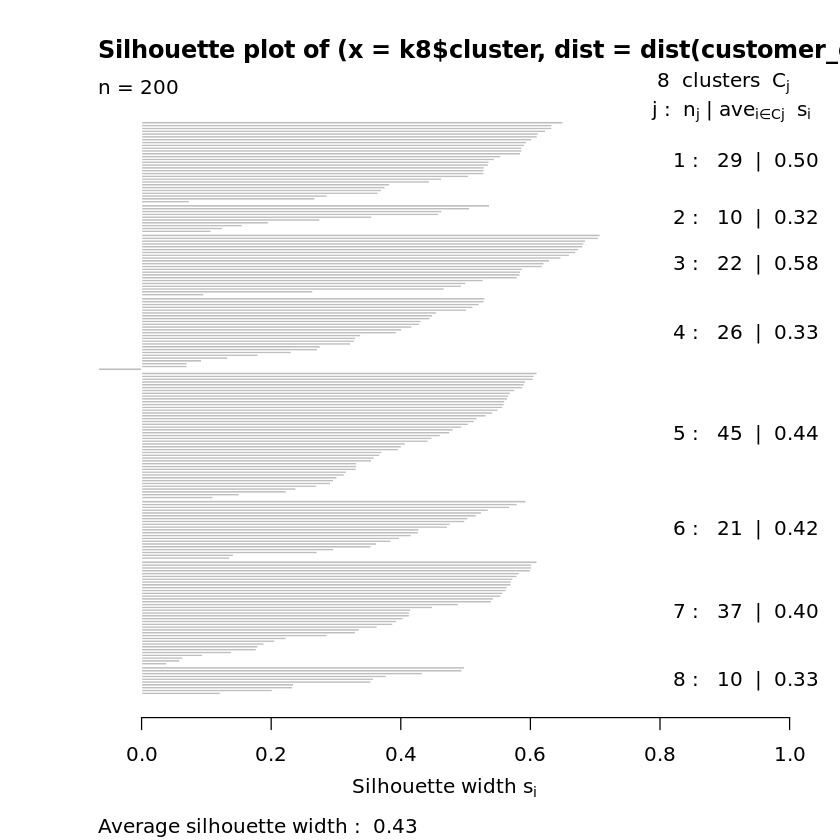

In [59]:
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))

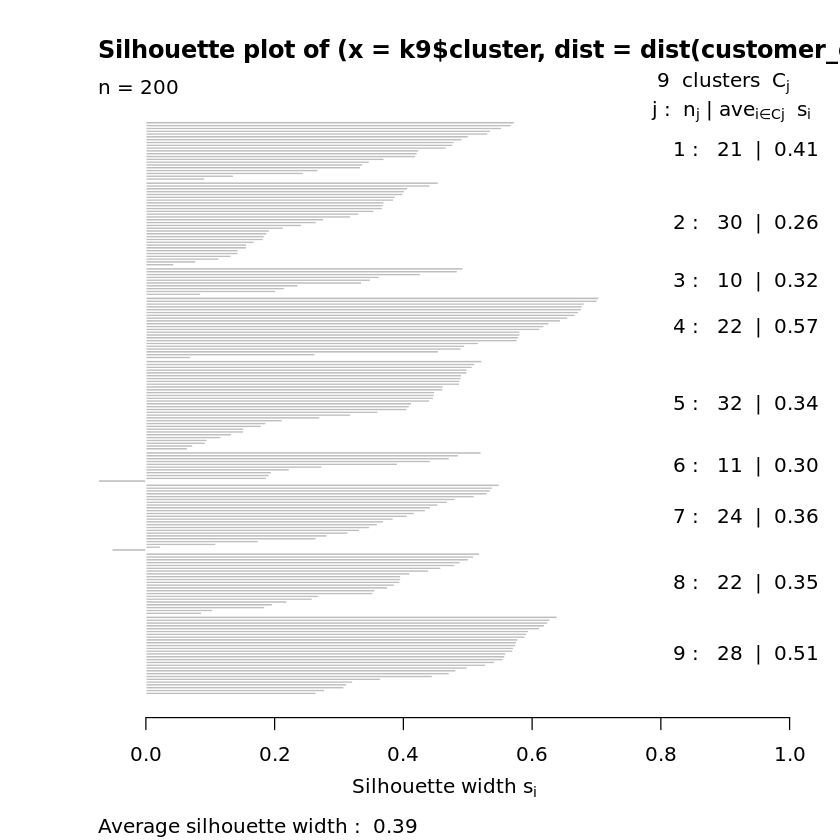

In [60]:
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))

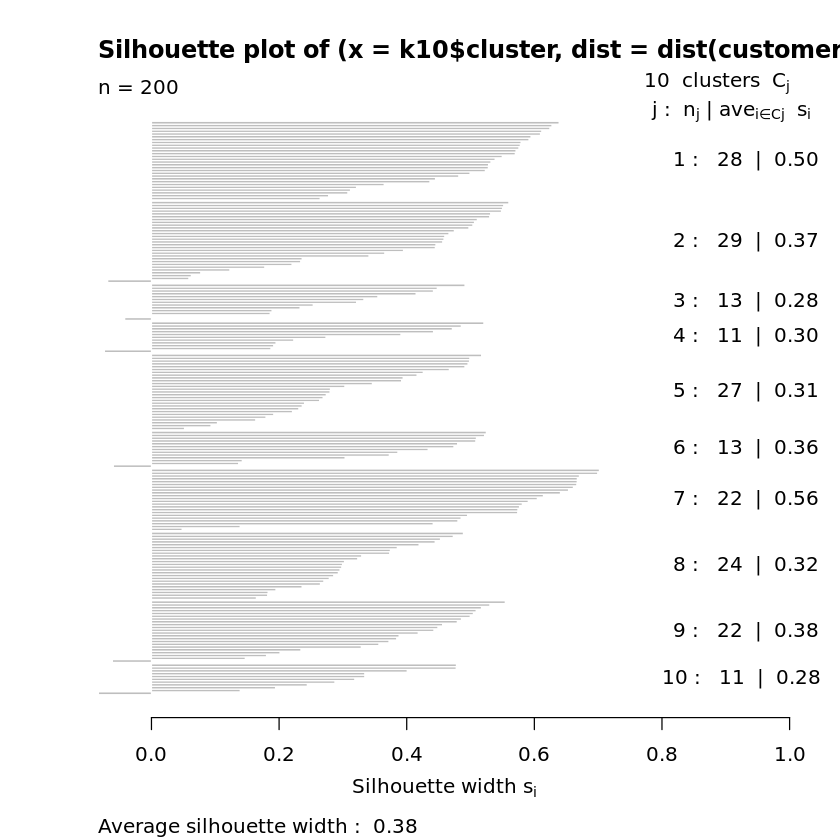

In [61]:
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

In [62]:
library(NbClust)
library(factoextra)

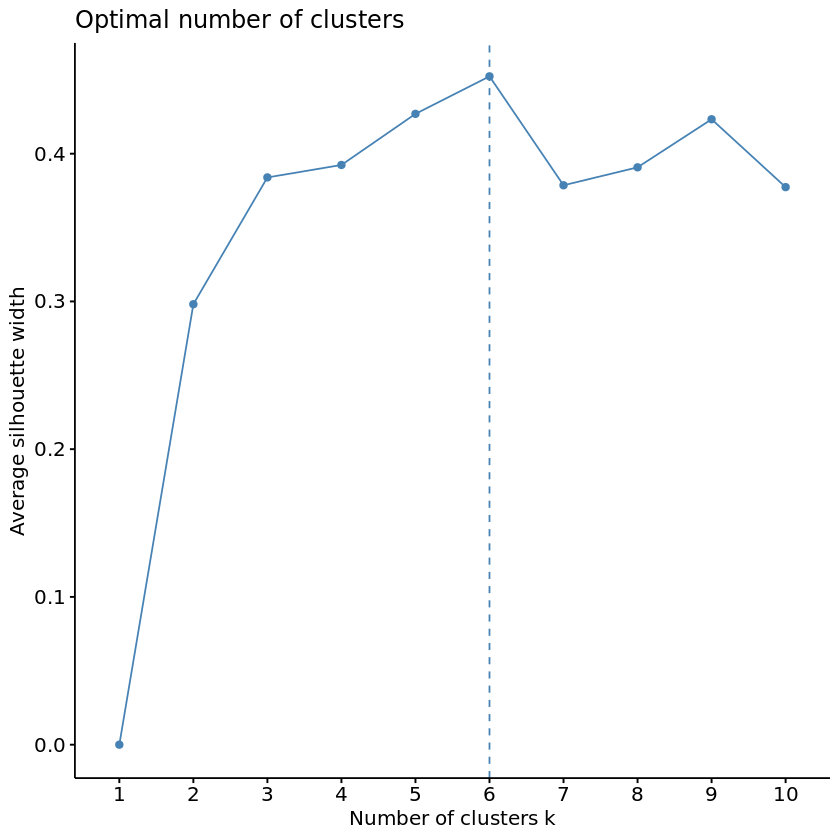

In [63]:
fviz_nbclust(customer_data[,3:5], kmeans, method = "silhouette")

### Gap Statistic Method


Nel 2001, i ricercatori dell'Università di Stanford - R. Tibshirani, G. Walther e T. Hastie hanno pubblicato il Gap Statistic Method. Possiamo usare questo metodo con uno qualsiasi dei metodi di clustering come K-medie, cluster gerarchici ecc. Usando la statistica gap, si può confrontare la variazione totale intracluster per diversi valori di k con i loro valori previsti sotto la distribuzione di riferimento nulla dei dati. Con l'aiuto delle simulazioni Monte Carlo, è possibile produrre il set di dati di esempio. Per ogni variabile nel set di dati, possiamo calcolare l'intervallo tra min (xi) e max (xj) attraverso il quale possiamo produrre valori in modo uniforme dall'intervallo inferiore al limite superiore.<br><br>
Per calcolare il metodo delle statistiche sulle lacune possiamo utilizzare la funzione clusGap per fornire statistiche sulle lacune e errore standard per un dato output.

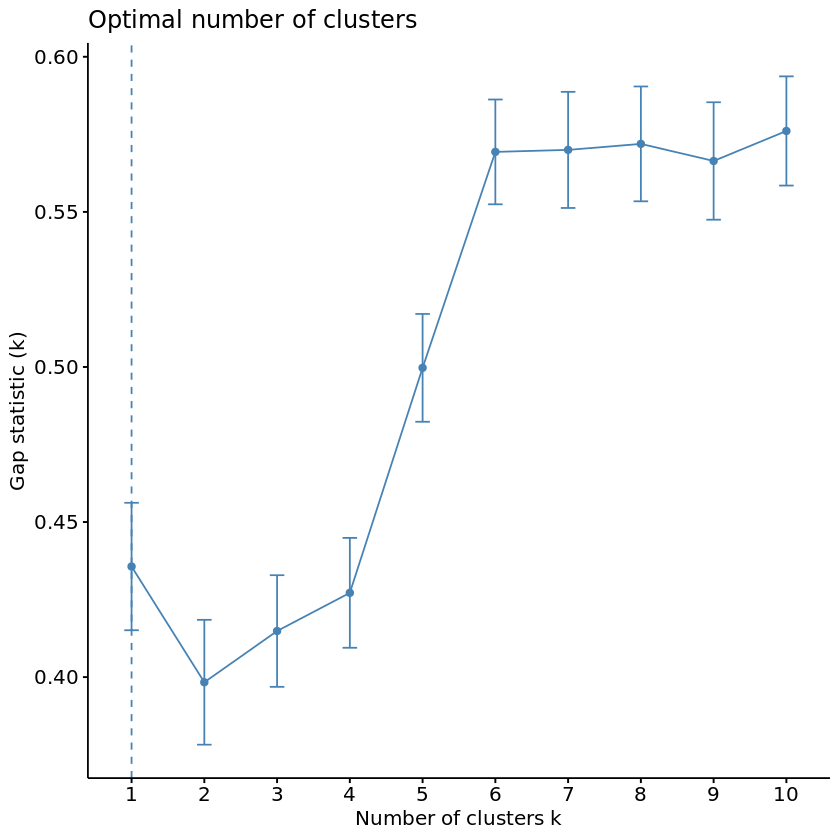

In [65]:
set.seed(125)
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

Ora prendiamo k=6 come cluster ottimale


In [35]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6


K-means clustering with 6 clusters of sizes 45, 22, 21, 38, 35, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 56.15556           53.37778               49.08889
2 25.27273           25.72727               79.36364
3 44.14286           25.14286               19.52381
4 27.00000           56.65789               49.13158
5 41.68571           88.22857               17.28571
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 [38] 2 3 2 1 2 1 4 3 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 [75] 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
[112] 4 4 4 4 4 1 1 1 1 4 4 4 6 4 6 5 6 5 6 5 6 4 6 5 6 5 6 5 6 5 6 4 6 5 6 5 6
[149] 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5
[186] 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6

Within cluster sum of squares by cluster:
[1]  8062.133  4099.818  7732.381  7742.895 166

Nell'output della nostra operazione kmeans, osserviamo un elenco con diverse informazioni chiave. Da ciò, concludiamo che le informazioni utili sono:

     cluster - Questo è un vettore di più numeri interi che indicano il cluster che ha un'allocazione di ciascun punto.
     totss - Rappresenta la somma totale dei quadrati.
     centri - Matrice comprendente diversi centri cluster
     withinss - Questo è un vettore che rappresenta la somma dei quadrati all'interno del cluster con un componente per cluster.
     tot.withinss - Indica la somma totale dei quadrati all'interno del cluster.
     betweenss - Questa è la somma dei quadrati tra cluster.
     size - Il numero totale di punti detenuti da ciascun cluster.



### Visualizing the Clustering Results using the First Two Principle Components

In [36]:

pcclust=prcomp(customer_data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


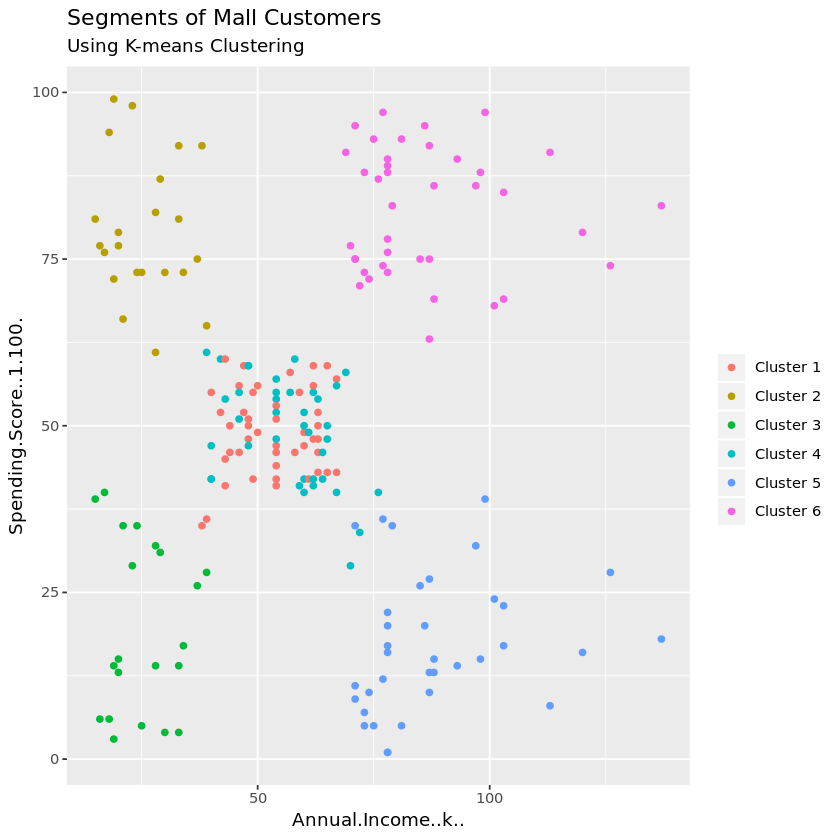

In [37]:
pcclust$rotation[,1:2]
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

Dalla visualizzazione sopra, osserviamo che esiste una distribuzione di 6 cluster come segue:

Cluster 6 e 4: questi cluster rappresentano i dati cliente con lo stipendio medio e lo stipendio medio annuo.

Cluster 1: questo cluster rappresenta i dati cliente con un reddito annuo elevato e una spesa annua elevata.

Cluster 3: questo cluster indica i dati cliente con un basso reddito annuo e una bassa spesa annuale di reddito.

Cluster 2: questo cluster indica un reddito annuo elevato e una spesa annuale bassa.

Cluster 5 - Questo cluster rappresenta un reddito annuo basso ma le sue spese annuali elevate.



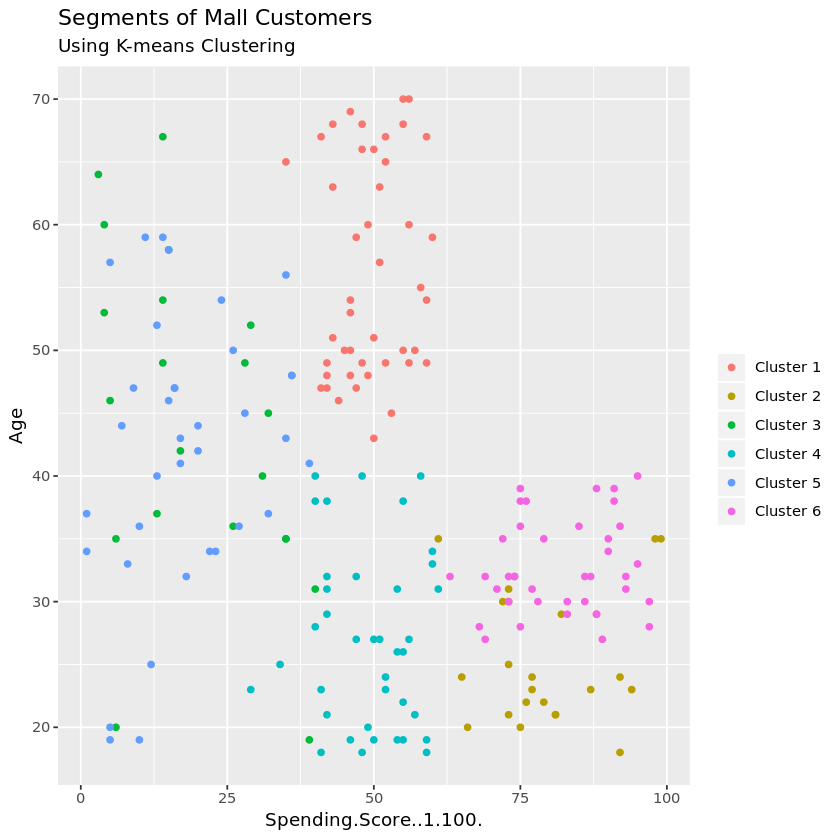

In [38]:
ggplot(customer_data, aes(x =Spending.Score..1.100., y =Age)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

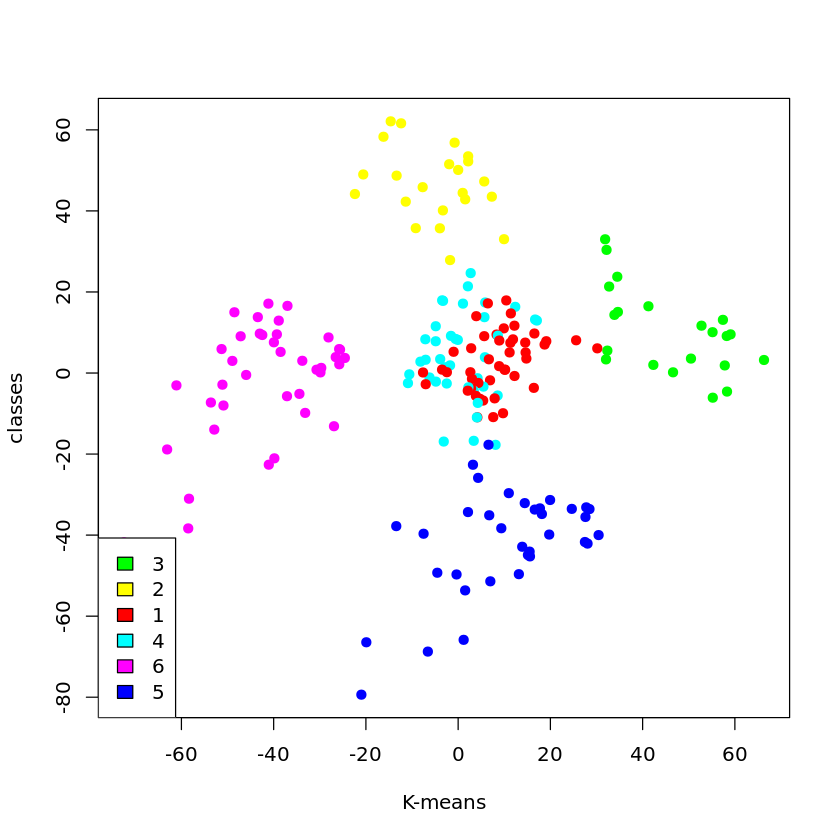

In [39]:
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

digCluster<-k6$cluster; dignm<-as.character(digCluster); # K-means clusters

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))

Cluster 4 e 1: questi due cluster sono costituiti da clienti con punteggio PCA1 medio e PCA2 medio.<br><br>
Cluster 6: questo cluster rappresenta i clienti con PCA2 elevato e PCA1 basso.<br><br>
Cluster 5 - In questo cluster, ci sono clienti con un PCA1 medio e un punteggio PCA2 basso.<br><br>
Cluster 3 - Questo cluster comprende clienti con un reddito elevato di PCA1 e un PCA2 elevato.<br><br>
Cluster 2 - Comprende clienti con un PCA2 elevato e una spesa media annua di entrate.


Con l'aiuto del clustering, possiamo capire molto meglio le variabili, spingendoci a prendere decisioni attente. Con l'identificazione dei clienti, le aziende possono rilasciare prodotti e servizi destinati ai clienti in base a diversi parametri come reddito, età, modelli di spesa, ecc. Inoltre, vengono presi in considerazione modelli più complessi come le recensioni dei prodotti per una migliore segmentazione.


## Conclusione

In questo progetto di data science, abbiamo esaminato il modello di segmentazione dei clienti. Lo abbiamo sviluppato utilizzando una branchia del  machine learning  nota come apprendimento non supervisionato (unsupervised learning). In particolare, abbiamo fatto uso di un algoritmo di clustering chiamato K-mean clustering. Abbiamo analizzato e visualizzato i dati e quindi abbiamo proceduto all'implementazione del nostro algoritmo. 